In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('grayscale')
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import train_test_split

import matplotlib.cm as cm


/home/billy/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_bi=np.loadtxt("Classifier_data_bi_sample.dat",skiprows=1,delimiter=",",usecols=(0,1,2))
target_bi=np.ones(data_bi.shape[0])
data_po=np.loadtxt("Classifier_data_po_sample.dat",skiprows=1,delimiter=",",usecols=(0,1,2))
target_po=np.zeros(data_po.shape[0])

data_bi=np.loadtxt("Classifier_data_bi.dat",skiprows=1,delimiter=",",usecols=(0,1,2))
target_bi=np.ones(data_bi.shape[0])
data_po=np.loadtxt("Classifier_data_po.dat",skiprows=1,delimiter=",",usecols=(0,1,2))
target_po=np.zeros(data_po.shape[0])


NameError: name 'm' is not defined

/home/billy/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


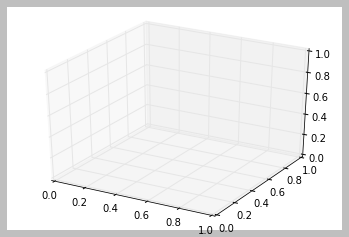

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_bi[:,1], data_bi[:,2], data_bi[:,0],c='red', marker=m)
ax.scatter(data_po[:,1], data_po[:,2], data_po[:,0],c='blue', marker=m)

ax.set_xlabel('posr (mm)')
ax.set_ylabel('MCEdepQuenched (MeV)')
ax.set_zlabel('Bab')

plt.show()

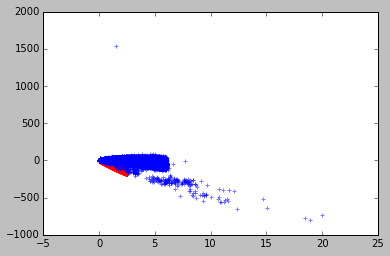

In [4]:
plt.scatter(data_bi[:,0], data_bi[:,2], c='red', alpha=0.5,marker='+')
plt.scatter(data_po[:,0], data_po[:,2], c='blue', alpha=0.5,marker='+')
plt.show()

In [12]:
print data_bi[0]
print data_po[0]
data=np.concatenate((data_bi,data_po))
target=np.concatenate((target_bi,target_po))
print data[:5]
print target[:-1]

[  1.91974000e-01   3.99563000e+03  -6.71336000e+00]
[  8.04170000e-02   2.88020000e+03   5.66920000e+00]
[[  1.91974000e-01   3.99563000e+03  -6.71336000e+00]
 [  6.80428000e-02   4.24317000e+03  -2.36040000e+00]
 [  1.78192000e-01   1.55866000e+03  -9.18740000e+00]
 [  1.39995000e-01   3.50617000e+03  -8.89812000e+00]
 [  1.72846000e-01   4.13282000e+03  -1.20677000e+01]]
[ 1.  1.  1. ...,  0.  0.  0.]


In [72]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
print X_test
print y_test

[[  1.50603000e-01   3.54591000e+03   2.79635000e+00]
 [  2.14018000e-01   3.32545000e+03  -1.37856000e+01]
 [  1.33081000e-01   1.89130000e+03  -6.13109000e+00]
 ..., 
 [  6.29625000e-02   2.86483000e+03   6.64565000e+00]
 [  1.63388000e-01   2.42489000e+03  -1.01090000e+01]
 [  6.62581000e-02   2.25425000e+03  -5.53441000e+00]]
[ 0.  1.  1. ...,  0.  1.  1.]


In [65]:
neuNet= MLPClassifier(activation= 'logistic', algorithm='l-bfgs', alpha=1e-4, hidden_layer_sizes=(4, 3), random_state=1)


In [73]:
neuNet.fit(X_train,y_train)
neuNet.score(X_test,y_test)

0.49980000000000002

In [69]:
neuNet.score(X_train,y_train)+neuNet.score(X_test,y_test)

0.99986667555674091